In [1]:
from utility_bfcombiner import *
from utility_commonPlot import *
from fit_modelSignal import *
from fit_modelControl import *

In [4]:
baseDir = common.getBaseDirectory()

# counting control
X1 = np.load(baseDir + "data/templates/counting_controlRegion/X_.npy")    
Y1 = np.sum(X1,axis=1)+0.1
model1 = PredictiveModel_Control(X1,shaping=False)
controlRegionCounting = (model1,X1,Y1)

# shaping control
X1 = np.load(baseDir + "data/templates/shaping_controlRegion/X_.npy")    
Y1 = np.sum(X1,axis=1)+0.1
model1 = PredictiveModel_Control(X1,shaping=True)
controlRegionShaping = (model1,X1,Y1)

In [5]:
beta0 = np.array([0.10887305, 0.10776438, 0.10684416,
                  0.11192234, 0.1101022 , 0.10542362,
                  0.10490536, 0.10764396, 0.10769418,
                  0.11032918, 0.10960175, 0.10708695])

combinerC = BFCombiner_theta(beta0,controlRegionCounting)
combinerS = BFCombiner_theta(beta0,controlRegionShaping)
combiner  = BFCombiner_theta(beta0)

# 1. Uncertainty of Combined BR

In [21]:
sig, cor = combiner.paramSigma()
height = 1/sig[3:]
print(sig[:3]/0.1080*100)

sigC, corC = combinerC.paramSigma()
heightC = 1/sigC[3:]
print(sigC[:3]/0.1080*100)

sigS, corS = combinerS.paramSigma()
heightS = 1/sigS[3:]
print(sigS[:3]/0.1080*100)

[1.96994397 2.02307716 6.02346811]
[1.60975654 1.77234139 4.86618384]
[1.16436713 1.36030529 3.17953948]


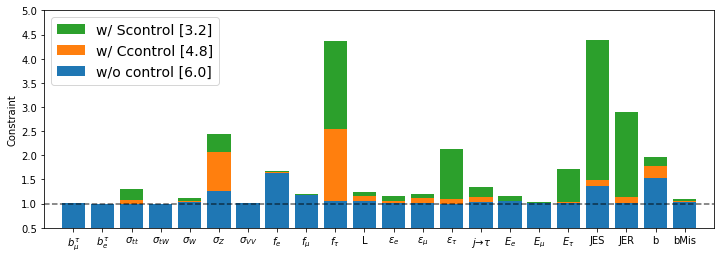

In [22]:
plt.figure(figsize=(12,4),facecolor='w')
c = np.arange(22)

plt.bar(c,heightS,label='w/ Scontrol [3.2]', color='C2')
plt.bar(c,heightC,label='w/ Ccontrol [4.8]', color='C1')
plt.bar(c,height ,label='w/o control [6.0]', color='C0')

plt.axhline(1,color='k',alpha=0.6,linestyle='--')
plt.legend(loc='upper left',fontsize = 14)
plt.ylim(0.5,5)
plt.xlim(-1,22)
plt.xticks(c,sysLabelsName()[3:])
plt.ylabel('Constraint')
plt.savefig('../plots/combine/constraint.png', dpi=300)

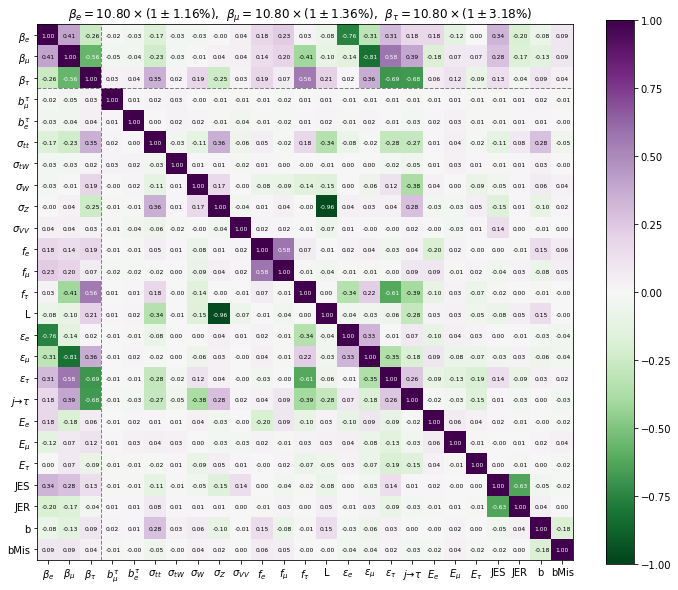

In [27]:
showParameterCovMat(corS,sigS)
plt.savefig('../plots/combine/covarMatrix_betaThetaS.png',dpi=300)

In [19]:
# for i in range(sig.size):
#     c,s = combiner.paramLS[i], sig[i]
#     print('{:7.4f} +/- {:6.4f}'.format(c,s))
# print(sig[0:3]/0.1080*100)
# print(1/sig[3:])